<a href="https://colab.research.google.com/github/codybaraks/Mchezopesa-Ltd/blob/master/Mchezopesa_Ltd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DEFINE QUESTION**

## **METRICS FOR SUCCESS**

## **THE CONTEXT**

## **EXPERIEMENTAL DESIGN**

In [0]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
import pandas_profiling as pp

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
%matplotlib inline

In [5]:
# Load fifa ranking dataset
fifa_ranking = pd.read_csv("fifa_ranking.csv")
fifa_ranking.head(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [6]:
# Loading the Dataset
# Reading the dataset
fifa = pd.read_csv("results.csv")
fifa.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [7]:
# fifa ranking shape
fifa_ranking.shape

(57793, 16)

In [8]:
# Checking the shape of the results dataset
fifa.shape

(40839, 9)

Consists of about 9 columns

In [9]:
# fifa ranking size
fifa_ranking.size

924688

In [10]:
# Check the size of the results dataset
fifa.size


367551

In [11]:
# results fifa ranking dataset info
fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 7.1+ MB


In [12]:
# Getting  a bit information from the dataframe
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null object
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [13]:
# Describing the data
fifa.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [14]:
pp.ProfileReport(fifa) # pandas


Number of variables,9
Number of observations,40839
Total Missing (%),0.0%
Total size in memory,2.5 MiB
Average record size in memory,65.0 B
Numeric,2
Categorical,6
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [15]:
# Merge the two datasets
# "pd.merge(df1, df2, on='employee')"
# fifa_main = pd.concat([fifa_ranking, fifa, on=""], axis=1 )
# fifa_main
# pd.merge(fifa_ranking, fifa, on='employee')")
fifa_main = fifa_ranking.merge(fifa, left_on="country_full", right_on="country")
fifa_main.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,Germany,False
1,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-05-16,Germany,Belgium,0,3,Friendly,Duisburg,Germany,False
2,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-10-16,Germany,Netherlands,1,2,Friendly,Kleve,Germany,False
3,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1911-03-26,Germany,Switzerland,6,2,Friendly,Stuttgart,Germany,False
4,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1911-10-09,Germany,Austria,1,2,Friendly,Dresden,Germany,False


In [16]:
fifa_main.head(2)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,Germany,False
1,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-05-16,Germany,Belgium,0,3,Friendly,Duisburg,Germany,False


In [17]:
# Checking for null values after concatinating
fifa_main.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
dtype: int64

In [18]:
fifa_main.head(2)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,Germany,False
1,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-05-16,Germany,Belgium,0,3,Friendly,Duisburg,Germany,False


In [19]:
# Convert to neutral column to Binary
conv = pd.get_dummies(fifa_main['neutral'], drop_first=True)
conv

,True
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [0]:
fifa_main["neutral"]= conv[True]

In [21]:
# # Checking corelation
# sns.heatmap(fifa_main)
fifa_main.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
date                        object
home_team                   object
away_team                   object
home_score                   int64
away_score                   int64
tournament                  object
city                        object
country                     object
neutral                      uint8
dtype: object

In [22]:
fifa_main['home_score'].corr(fifa_main['rank'])

-0.08875851785468925

In [55]:
fifa_main.shape

(10246510, 25)

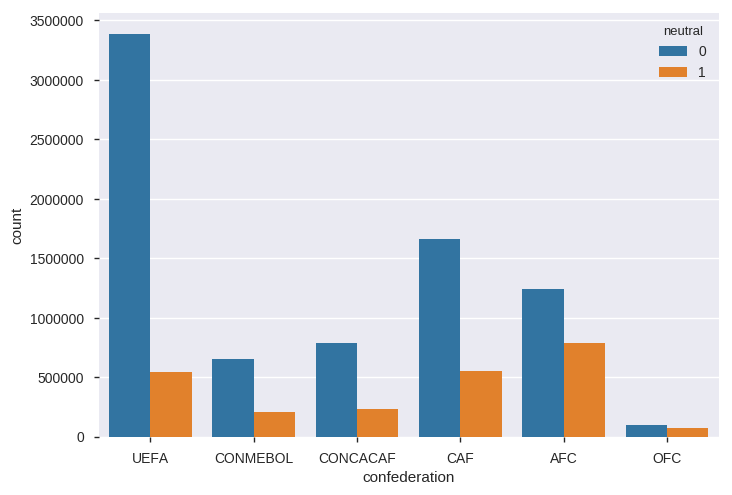

In [23]:
sns.countplot(x='confederation', data=fifa_main, hue='neutral')

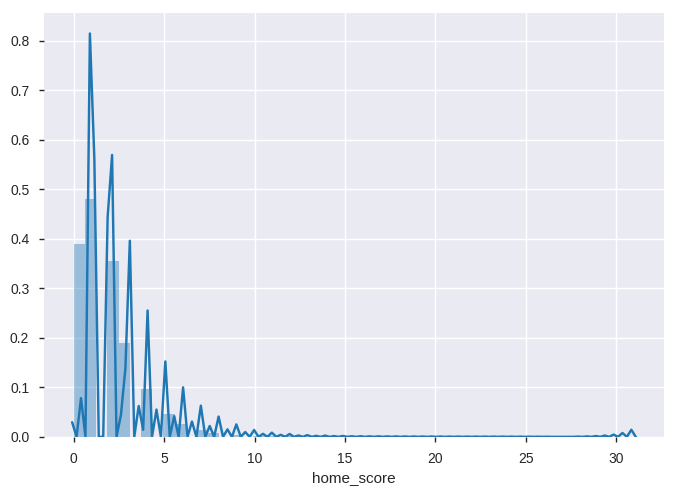

In [24]:
# Distribution plot
# distplot
sns.distplot(fifa_main['home_score'])

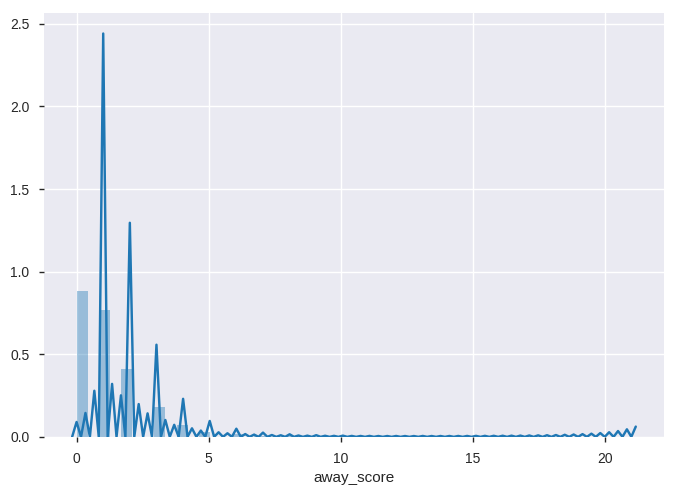

In [25]:
# Distribution plot
# distplot
sns.distplot(fifa_main['away_score'])

In [26]:
fifa_main.head(1)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,Germany,0


## **Polynomial Regression -  Approach 1**

In [43]:
# Checking if columns have been droped
X.head(5)

0    1
1    1
2    1
3    1
4    1
Name: rank, dtype: int64

In [35]:
# sns.heatmap(X)
fifa_main['home_score'].corr(fifa_main['rank'])

-0.08875851785468925

In [36]:
fifa_main['home_score'].corr(fifa_main['total_points'])

0.030137547130374077

In [37]:
fifa_main['home_score'].corr(fifa_main['previous_points'])

0.06454369838048195

In [38]:
fifa_main['home_score'].corr(fifa_main['rank_change'])

0.00012462055219151176

In [0]:
# Split the dataset
# X = wine.drop(['quality'],axis=1)
# X = fifa_main.drop(['country_full','country_abrv','confederation','rank_date','date', 'home_team','away_team','tournament','city','country'],axis=1)
X = fifa_main['rank'].values.reshape(-1,1)
y = fifa_main.home_score

In [0]:
# Import train test split
from sklearn.model_selection import train_test_split

In [0]:
# Train the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [73]:
# Fit a Linear Regression
fifa_reg = LinearRegression()
fifa_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

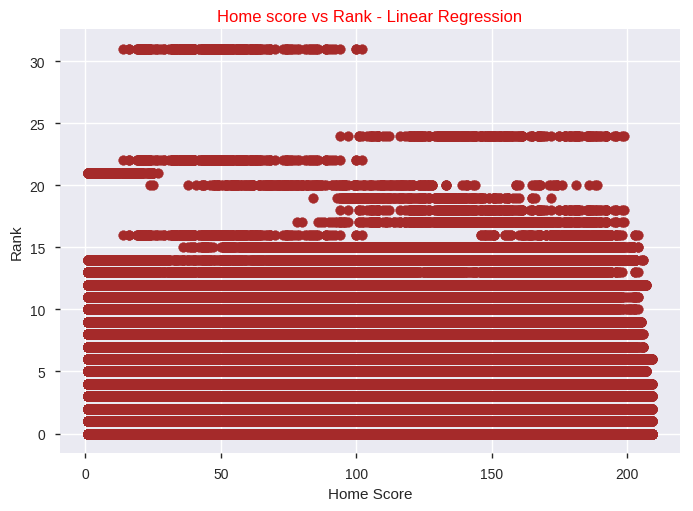

In [74]:
# Scatter Plot. Visualize after doing lnear regression
plt.scatter(X,y, color ="brown")
plt.title("Home score vs Rank - Linear Regression", color="red")
plt.xlabel("Home Score")
plt.ylabel("Rank")
plt.show()

In [75]:
# Fit polynormial regression to dataset
poly_reg = PolynomialFeatures(degree=8)
X_poly = poly_reg.fit_transform(X)

pol_li = LinearRegression()
pol_li.fit(X_poly,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

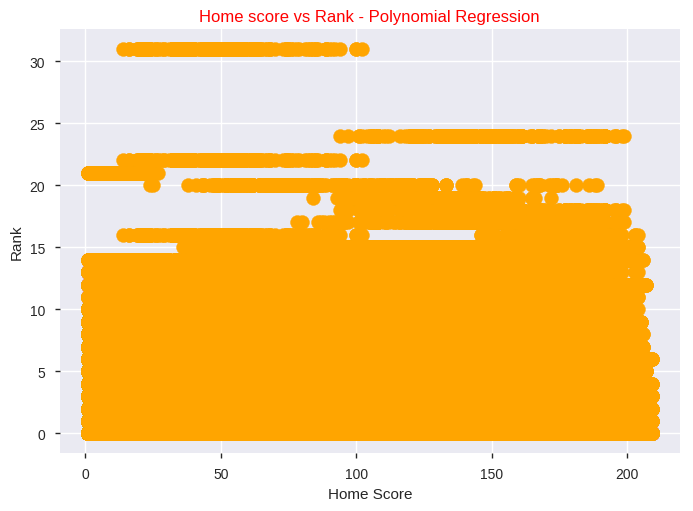

In [61]:
# Plotting after polynomial Regression
# plt.scatter(df.preTestScore, df.postTestScore, s=300, c=df.female)

plt.scatter(X, y, s=100, color ="orange")
plt.title("Home score vs Rank - Polynomial Regression", color="red")
plt.xlabel("Home Score")
plt.ylabel("Rank")
plt.show()

In [67]:
# Prediction using Polynomial Regression
poly_pred = pol_li.predict(X_poly)
print("The prediction for polynomial is", poly_pred)

The prediction for polynomial is [1.99983671 1.99983671 1.99983671 ... 1.45940466 1.45940466 1.45940466]


**Predition for The number of goals scored by the Home team is about 2**

In [68]:
# Actual vs Prediction
compar = pd.DataFrame({'Actual': y, 'Predicted': poly_pred})
compar.head()

,Actual,Predicted
0,1,1.999837
1,0,1.999837
2,1,1.999837
3,6,1.999837
4,1,1.999837


In [70]:
compar.describe()

,Actual,Predicted
count,1.024651e+07,1.024651e+07
mean,1.734292e+00,1.734292e+00
std,1.733112e+00,1.736001e-01
min,0.000000e+00,8.308162e-01
25%,1.000000e+00,1.603805e+00
50%,1.000000e+00,1.684510e+00
75%,2.000000e+00,1.909042e+00
max,3.100000e+01,1.999837e+00


In [0]:
# RMSE
# Metrics
from sklearn import metrics
from sklearn.metrics import r2_score,mean_absolute_error

In [81]:
print("RMSE IS ",np.sqrt(metrics.mean_squared_error(y_test,poly_pred)))

ValueError: ignored

## **Model 2: Predict how many goals the away team scores**

In [0]:
plt.scatter(x,y,color=’red’)
plt.plot(x,regressor.predict(poly.fit_transform(x)),color=’blue’)
plt.show()

In [0]:
sns.heatmap(fifa_main)

In [0]:
# Pairplot
g = sns.pairplot(fifa_main[['home_score','away_score']])
g